In [13]:
import pandas as pd
file_path='./data/chipotle.tsv'
chipo=pd.read_csv(file_path,sep='\t')
chipo.head(10)
#데이터 전처리 'item_price'의 앞에 $ 없애주기#
chipo['item_price']=chipo['item_price'].apply(lambda x:float(x[1:]))
chipo_per_price=chipo[chipo.quantity==1]
price_per_item=chipo_per_price.groupby('item_name').min()#토핑 없는거 추출#
price_per_item.sort_values(by='item_price',ascending=False)[:10]


a=chipo.groupby('order_id').sum().sort_values(by='item_price',ascending=False)[:5]
a
chipo_salad=chipo[chipo['item_name']=="Veggie Salad Bowl"]#베기 샐러드 볼을 시킨 것들만 모아 놓음#
chipo_salad=chipo_salad.drop_duplicates(['order_id'])# 그 모아놓은 것들 중 아이템 네임과 오더아이디가 겹치는 것들을 제거#\
print(len(chipo_salad))
chipo_salad.head(5)
chipo_chicken=chipo[chipo['item_name']=='Chicken Bowl']
chipo_ordersum=chipo_chicken.groupby('order_id').sum()['quantity']
chipo_results=chipo_ordersum[chipo_ordersum>=2]
print(len(chipo_results))
chipo_results.head(5)

18
114


order_id
2      2
34     2
70     2
93     2
124    3
Name: quantity, dtype: int64

In [ ]:
c

In [7]:
chipo.groupby('order_id').sum().sort_values(by='item_price',ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [37]:
#주문당 평균 계산금액 알아보기#
chipo.groupby('order_id')['item_price'].sum().mean()

18.81142857142869

In [49]:
chipo_orderid_group=chipo.groupby('order_id').sum()
results=chipo_orderid_group[chipo_orderid_group.item_price >=10]
print(results[:10])

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20


In [56]:
#각 아이템당 가격 유츄#
chipo_one_item=chipo[chipo.quantity==1]
chipo_per_price=chipo_one_item.groupby('item_name').min()
chipo_per_price.sort_values(by="item_price",ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [31]:
chipo['item_price']=chipo['item_price'].apply(lambda x:float(x[1:]))
chipo.describe()

TypeError: 'float' object is not subscriptable

In [1]:
chipo_per_price=chipo[chipo.quantity==1]
price_per_item=chipo_per_price.groupby('item_name').min()#토핑 없는거 추출#
price_per_item.sort_value(by='item_price',ascending=False[:10])

<>:3: SyntaxWarning: 'bool' object is not subscriptable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'bool' object is not subscriptable; perhaps you missed a comma?


NameError: name 'chipo' is not defined

In [28]:
print(chipo.describe())
item_count=chipo['item_name'].value_counts()[:10]

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [24]:
chipo.head(10)
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))


1834
50


In [25]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [29]:
order_count=chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [33]:
item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

Text(0.5, 1.0, 'Distribution of all ordered item')

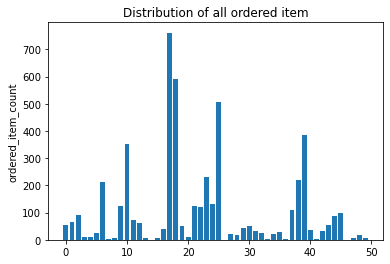

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
item_name_list=item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt=item_quantity.values.tolist()

plt.bar(x_pos,order_cnt,align='center')
plt.ylabel("ordered_item_count")
plt.title("Distribution of all ordered item")


In [38]:
print(chipo.info())
print("--------------")
chipo['item_price'].head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
--------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
5    $10.98 
6     $1.69 
7    $11.75 
8     $9.25 
9     $9.25 
Name: item_price, dtype: object

In [39]:
#column 단위 데이터에 apply() 함수로 전처리를 적용합니다#
chipo['item_price']=chipo['item_price'].apply(lambda x:float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [50]:
chipo.groupby('order_id')['item_price'].sum().mean()


18.811428571428717

In [51]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [3]:
chipo_orderid_group=chipo.groupby('order_id').sum()
results=chipo_orderid_group[chipo_orderid_group.item_price>=10]
print(results[:10])
print(results.index.values)
chipo.groupby('order_id')['item_price'].sum().mean()

NameError: name 'chipo' is not defined

In [5]:
chipo.head(10)

NameError: name 'chipo' is not defined

In [2]:
chipo.groupby('order_id')['item_price'].sum().mean()

NameError: name 'chipo' is not defined